In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
data=pd.read_csv("/content/heart_disease.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


In [ ]:
# number of rows and columns in the dataset
data.shape

(303, 13)

In [ ]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [ ]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Splitting the Features and Target
X = data.drop(columns='target', axis=1)
Y = data['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,2


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
"""
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
standardized_data
X=standardized_data
Y=data["target"]
print(X,Y)

"""

'\nscaler=StandardScaler()\nscaler.fit(X)\nstandardized_data=scaler.transform(X)\nstandardized_data\nX=standardized_data\nY=data["target"]\nprint(X,Y)\n\n'

In [ ]:
# Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 12) (242, 12) (61, 12)


In [ ]:
# Multiple Models Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "SVM": SVC(),
    "XG Boost": XGBClassifier(),
    "Decision Tree":DecisionTreeClassifier()
}

# Initialize an empty list to store F1 scores
f1_scores = []
model_names=[]

# Iterate through each model
for name, model in models.items():
    # Training the classifier
    model.fit(X_train, Y_train)

    # Predictions on training data
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)

    # Predictions on test data
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, Y_test)

    # Calculate F1 score and append to the list
    f1 = f1_score(Y_test, test_predictions)
    f1_scores.append(f1)
    model_names.append(name)

    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    overall_accuracy = ((train_accuracy + test_accuracy) / 2)*100
    print('Overall accuracy: ', overall_accuracy)
    print()


Model: Logistic Regression
Training Accuracy: 0.84
Test Accuracy: 0.84
F1 Score: 0.85
Overall accuracy:  83.95203901910311

Model: K Nearest Neighbor
Training Accuracy: 0.79
Test Accuracy: 0.62
F1 Score: 0.66
Overall accuracy:  70.403739330714

Model: Random Forest
Training Accuracy: 1.00
Test Accuracy: 0.74
F1 Score: 0.75
Overall accuracy:  86.88524590163935

Model: SVM
Training Accuracy: 0.69
Test Accuracy: 0.62
F1 Score: 0.68
Overall accuracy:  65.85828478525946

Model: XG Boost
Training Accuracy: 1.00
Test Accuracy: 0.74
F1 Score: 0.75
Overall accuracy:  86.88524590163935

Model: Decision Tree
Training Accuracy: 1.00
Test Accuracy: 0.75
F1 Score: 0.75
Overall accuracy:  87.70491803278688



**Random Forest**

In [ ]:
# Model Training & Evaluation
classifier = RandomForestClassifier()

#training the Decision Tree Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

overall_accuracy = ((training_data_accuracy + test_data_accuracy) / 2) * 100
print('Overall accuracy: ', overall_accuracy)

# Confusion Matrix
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix:', conf_matrix_test)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7704918032786885
Overall accuracy:  88.52459016393442
Confusion Matrix: [[22  6]
 [ 8 25]]


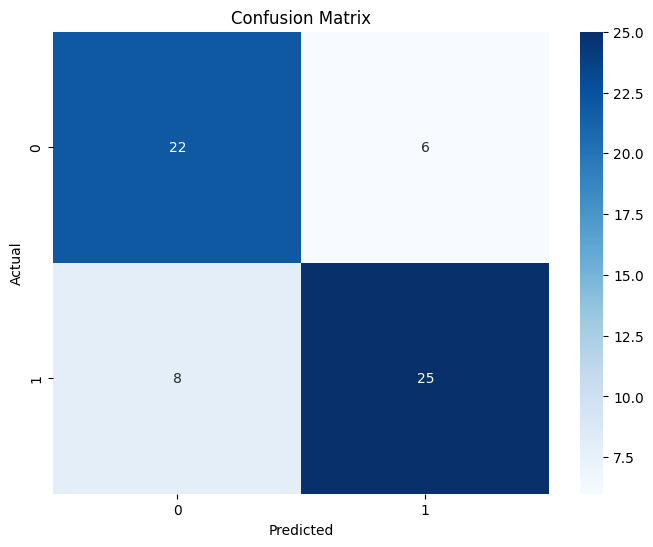

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Predictive System**

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


**Saving the trained model**

In [ ]:
import joblib

In [ ]:
filename = 'heart_disease.sav'
joblib.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
heart_model = joblib.load(open('heart_disease.sav', 'rb'))

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


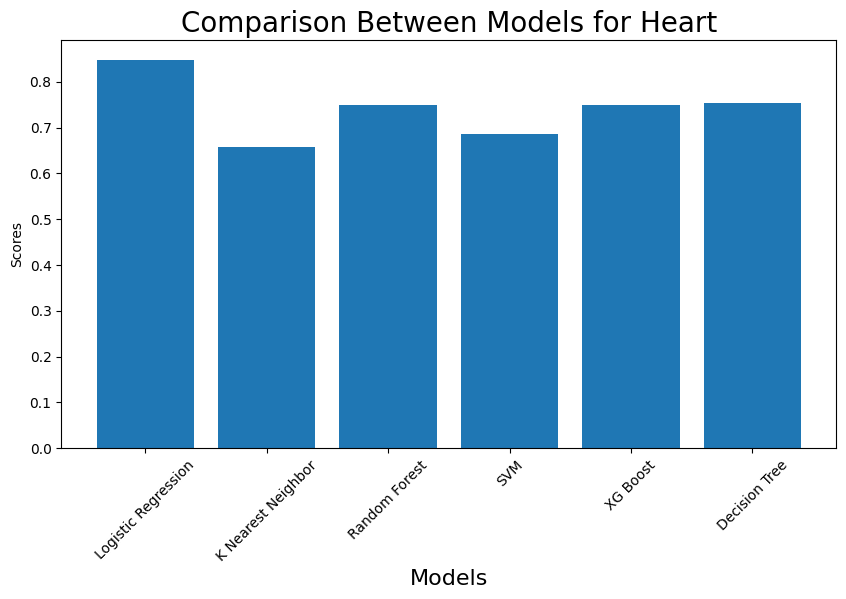

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(model_names, f1_scores)

# Set the title and axis labels
ax.set_title('Comparison Between Models for Heart', fontsize=20)
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=10)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()